In [149]:
# Removes the need to call plt.show() every time
# %matplotlib inline

# Import all necessary libraries
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set() # Make it prettier
import pandas as pd 
import numpy as np
from collections import defaultdict

In [150]:
# Import Data
SchoolFinance = pd.read_csv('elsec15.csv', index_col=False, low_memory=False)

In [151]:
# Overall Shape
SchoolFinance.shape

(14376, 141)

In [152]:
# Statistics
SchoolFinance.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [153]:
# Head
SchoolFinance.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [154]:
# Sum to find total current spending on instruction
InstrElem = SchoolFinance[['E13', 'J13', 'J12', 'J14', 'V91', 'V92']]
InstrSum = InstrElem.sum(axis=1)

In [155]:
# Picking out data columns that we want to examine
SchoolFinanceShort = SchoolFinance[['STATE', 'NAME', 'TOTALREV', 'TOTALEXP', 'Z32', 'Z34', '_19H']]

# STATE - Location of School
# NAME - Name of school district ?? idk
# TOTALREV - Total Revenue to school
# TOTALEXP - Total Expenditure of school
# Z32 - TSALWAGE - Total salaries and wages
# Z34 - TEMPBENE - Total employee benefit payments
# _19H - Long-term debt outstanding at beginning of the fiscal year

# Append Total Spending on Instruction to SchoolDist
# 0 is column header for Total Spending on Instruction
SchoolFinanceShort = pd.concat([SchoolFinanceShort, InstrSum], axis=1)

In [156]:
# Print Head of Shortened Dataset before cleaning
SchoolDistShort.head()

,STATE,NAME,TOTALREV,TOTALEXP,Z32,Z34,_19H,0
0,1,AUTAUGA COUNTY SCHOOL DISTRICT,79665,76069,42440,17720,49431,44085
1,1,BALDWIN COUNTY SCHOOL DISTRICT,330317,297083,153812,60668,337160,155692
2,1,BARBOUR COUNTY SCHOOL DISTRICT,10519,10314,5317,2100,8024,5249
3,1,EUFAULA CITY SCHOOL DISTRICT,26076,25602,13627,5667,0,14887
4,1,BIBB COUNTY SCHOOL DISTRICT,31825,31293,16925,7005,22155,16201


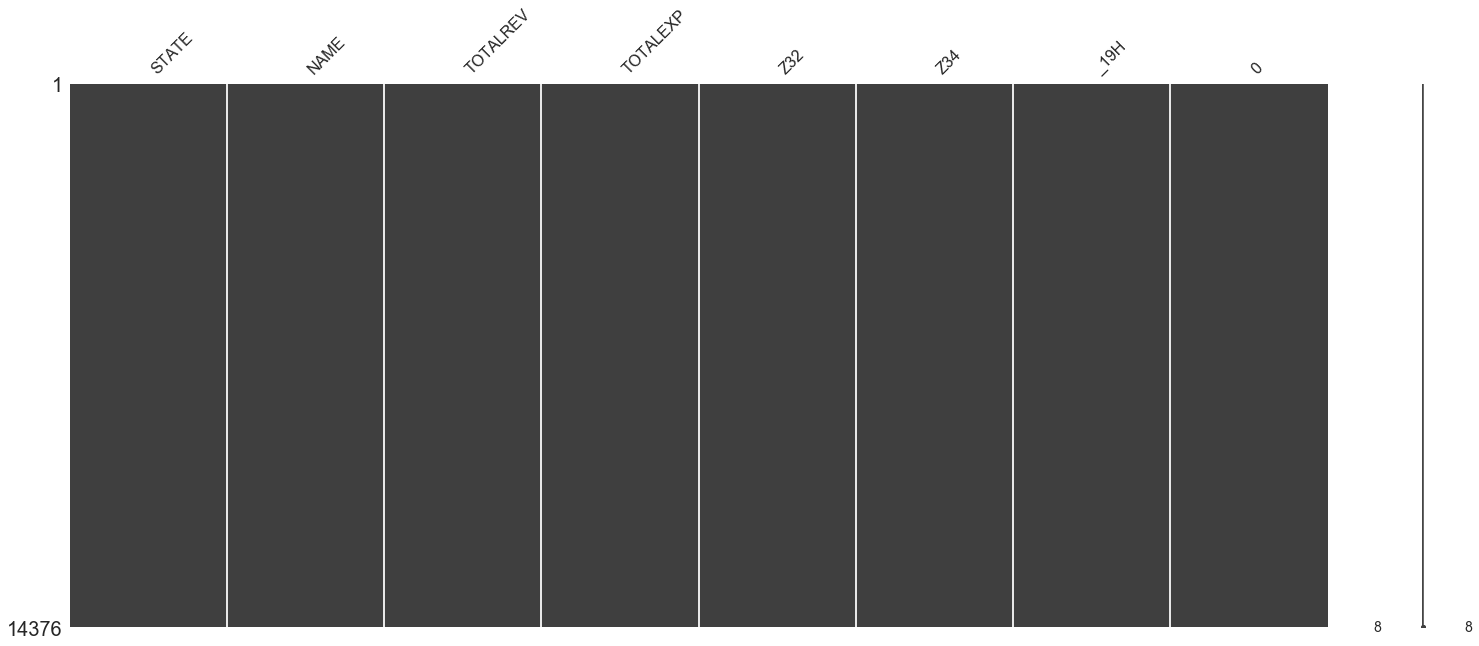

In [157]:
# Check Dataset for Missing data, no missing data!
msno.matrix(SchoolDistShort)

In [158]:
# Find out how many entries are empty in data frame and where they are
np.where(pd.isnull(SchoolDistShort))

(array([], dtype=int64), array([], dtype=int64))

**The output of locations of empty or NaN values is empty, so the dataset is complete and does not need further cleaning**

In [159]:
# Summing up all TOTALREV for schools in each state
totalrev_dict = defaultdict(lambda:0)
for index, row in SchoolDistShort.iterrows():
    totalrev_dict[row.STATE] += row.TOTALREV
sorted_by_state = sorted(totalrev_dict.items())
state, total_rev = zip(*sorted_by_state)

<function matplotlib.pyplot.show>

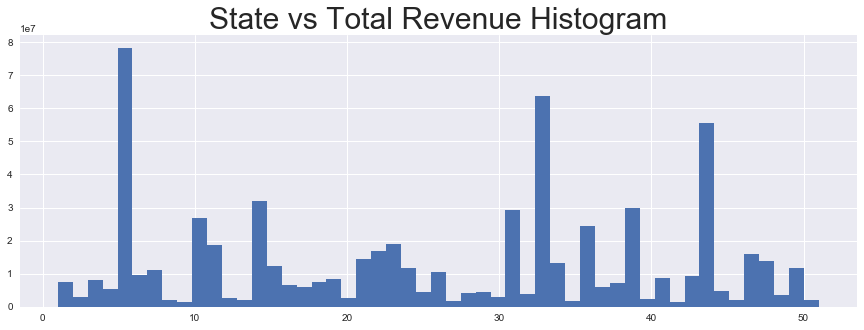

In [160]:
# Histogram of State vs Total Revenue
plt.figure(figsize=(15, 5))
plt.hist(state, weights=total_rev, bins=len(state))
plt.title("State vs Total Revenue Histogram", fontsize=30)
plt.show

**We can see that there are three states with much higher total revenue than the rest.**

**These states are:**  
1 - California  
2 - New York  
3 - Texas

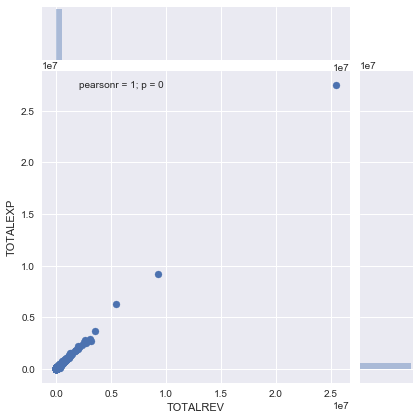

In [161]:
# Total Revenue vs Total Expenditures
sns.jointplot(SchoolDistShort.TOTALREV, SchoolDistShort.TOTALEXP)

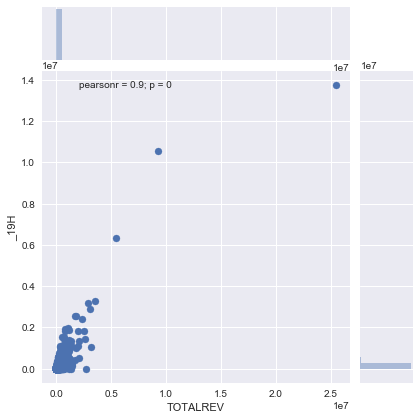

In [162]:
# Total Revenue vs Long Term Debt Outstanding
sns.jointplot(SchoolDistShort.TOTALREV, SchoolDistShort._19H)

**We can see in both of these plots that there are several outliers that don't represent the whole data set.  
Let's zoom in on the graph to get a better representation of the entire data set.**

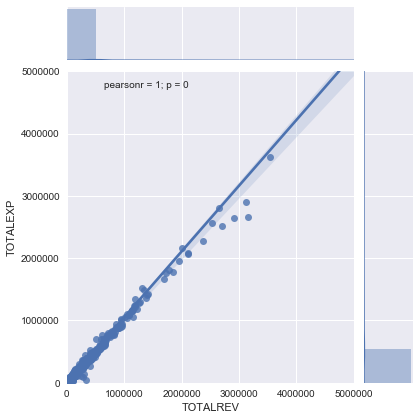

In [163]:
# Total Revenue vs Total Expenditures; Zoomed to remove outliers; Regression includes outliers
sns.jointplot(SchoolDistShort.TOTALREV, SchoolDistShort.TOTALEXP, xlim=(0,0.5e7), ylim=(0, 0.5e7), kind="reg")

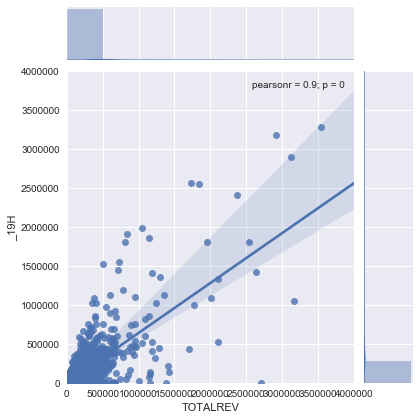

In [164]:
# Total Revenue vs Long Term Debt Outstanding; Zoomed in to remove outliers; Regression includes outliers
sns.jointplot(SchoolDistShort.TOTALREV, SchoolDistShort._19H, xlim=(0, 0.4e7), ylim=(0, 0.4e7), kind="reg")

**We can see in these two plots that the data between Total Revenue vs Total Expenditures and Total Revenue vs Long Term Debt Outstanding are both somewhat linear.**

**Let's look at some other relationships between our data.**

In [ ]:
# totalexp vs 0 (swarm)
# rev vs sal & wages/employee benefits
# can check one school like california
# exp - row 0, see what rest is
# reg: rev vs spending on debt/spending on instruction